## Instalando e importando bibliotecas e preparando o grafo.

In [1]:
!pip install osmnx
!pip install networkx
!pip install matplotlib

In [2]:
import networkx as nx
import osmnx as ox
import numpy as np

ox.__version__

'1.9.4'

In [3]:
# download/model a street network for some city then visualize it
#G_all = ox.graph_from_place("Natal, Rio Grande do Norte, Brasil", network_type='all', simplify=True)
#G_walk = ox.graph_from_place("Natal, Rio Grande do Norte, Brasil", network_type='walk', simplify=True)
G_drive = ox.graph_from_place("Natal, Rio Grande do Norte, Brasil", network_type='drive', simplify=True)
#G_bike = ox.graph_from_place("Natal, Rio Grande do Norte, Brasil", network_type='bike', simplify=True)

# fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color="g", edge_linewidth=0.2)

In [4]:
# what sized area does our network cover in square meters?
# G_proj = ox.project_graph(G_drive)
# nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
# graph_area_m = nodes_proj.unary_union.convex_hull.area
# print(graph_area_m, "m²")

In [5]:
# Identificando caminhos fechados (ciclos) no grafo da cidade com locais em que é possível dirigir.

#D_drive = ox.convert.to_undirected(ox.convert.to_digraph(G_drive))
#G_drive_cycles = nx.simple_cycles(G_drive, 0)


#G_drive_cycles = list(nx.simple_cycles(G_drive))
#print(G_drive_cycles)

Quantidade de nós e arestas para o grafo G_drive - grafo das vias onde é possível dirigir - __simpificado__ . De acordo com a documentação os grafos simplificados possuem os nós intermediários removidos.

In [6]:
print(nx.number_of_nodes(G_drive))
print(nx.number_of_edges(G_drive))

18662
48517


## Usando a propriedade de ciclos em grafos para avaliar a possibilidade de criar itinerários de transporte público.

Calculando o maior ciclo da rede o qual apresenta o maior caminho fechado possível de vias dirigíveis. Pode ser considerado um possível caminho de estudo para criação de um itinerário de transporte público que ligue a zona norte de Natal a zona leste com um circular alimentador em horários de pico.

Como há muitos caminhos curtos que passam por dentro de baiiros da zona norte seria possível reduzir esse caminho para que o itenerário passe pelas ruas principais dos bairros periféricos para suprir a necessidade da população que depende de itinerários que passam somente em avenidas ou rodovias.

É uma possível solução para diminuir a quantidade integrações pela população e com um estudo mais específico é possível criar um itinerário que circula entre zona norte e zona leste com um menor gasto de combustível possível.

In [7]:
print("Quantidade de nós: ", nx.number_of_nodes(G_drive))
print("Quantidade de arestas: ", nx.number_of_edges(G_drive))


## Encontrar a maior circunferência no grafo
try:
  ## Convert G_drive to a simple undirected graph without parallel edges
  #G_drive_undirected = ox.get_undirected(G_drive)
  G_drive_undirected = ox.convert.to_undirected(G_drive)

  ## Convert the MultiGraph to a simple Graph
  G_drive_simple = nx.Graph(G_drive_undirected)
  cycle = nx.cycle_basis(G_drive_simple)
  if cycle:
    largest_cycle = max(cycle, key=len)
    #print("Maior ciclo encontrado:", largest_cycle)

    ## Plotar o grafo com o maior ciclo destacada
    # Since G_drive_undirected doesn't have parallel edges, we can use it for plotting as well
    edge_color = ['r' if edge in [(largest_cycle[i], largest_cycle[(i + 1) % len(largest_cycle)]) for i in range(len(largest_cycle))] else 'gray' for edge in G_drive_undirected.edges()]

    #fig, ax = ox.plot_graph(G_drive_undirected, figsize=(10, 10), node_size=0, edge_color=edge_color, edge_linewidth=0.5, bgcolor='white')

    total_length = 0
    for i in range(len(largest_cycle)):
      u, v = largest_cycle[i], largest_cycle[(i + 1) % len(largest_cycle)]
      if G_drive_undirected.has_edge(u, v):
        edge_data = G_drive_undirected.get_edge_data(u, v)
        #print("Edge: ", i, " ", edge_data)
        if edge_data:
          length_meters = list(edge_data.values())[0].get('length')  # Changed line
          #print("meters: ", length_meters)
          total_length += length_meters
          #print("total_length: ", total_length)

    total_length_km = total_length / 1000
    print("Tamanho do maior ciclo encontrado (km):", total_length_km)


except nx.NetworkXNoCycle:
  print("O grafo não contém ciclos.")

Quantidade de nós:  18662
Quantidade de arestas:  48517
Tamanho do maior ciclo encontrado (km): 126.28212400000007


## Avarage Shortest Path Lenght

No bloco de código abaixo é possível ver que a quantidade de arestas do diâmetro da rede é 209 e a média dos menores caminhos entre nós da rede é de 79 arestas aproximadamente. A média da distância entre nós de uma rede pode não ser uma métrica precisa mas é possível observar quando uma rede é conectada, fortemente conectada ou não possui muitas conexões. Neste caso a média é bem menor que o tamnho do diâmetro da rede.

In [8]:
# prompt: get the diameter of G_drive graph

import networkx as nx

try:
  # Compute the diameter of the graph
  diameter = nx.diameter(G_drive_simple)
  print("Diameter of G_drive:", diameter)
except nx.NetworkXError:
  print("The graph is not connected, diameter cannot be calculated.")

avg_shortest_path_lenght = nx.average_shortest_path_length(G_drive_simple)
print("Avarage Shortest Path: ", avg_shortest_path_lenght)

Diameter of G_drive: 209
Avarage Shortest Path:  79.07341381725583


## Diâmetro

In [21]:
# prompt: calcule  e mostre a distância em kilômetros do diâmetro de G_drive_simple

import networkx as nx
import osmnx as ox
import numpy as np

# ... (Your existing code) ...


try:
  # ... (Your existing code) ...

  total_length = 0
  for i in range(len(largest_cycle)):
    u, v = largest_cycle[i], largest_cycle[(i + 1) % len(largest_cycle)]
    if G_drive_undirected.has_edge(u, v):
      edge_data = G_drive_undirected.get_edge_data(u, v)
      if edge_data:
        length_meters = list(edge_data.values())[0].get('length')
        total_length += length_meters

  total_length_km = total_length / 1000
  print("Tamanho do maior ciclo encontrado (km):", total_length_km)

  # Calculate the diameter of G_drive_simple in kilometers
  if nx.is_connected(G_drive_simple):
      diameter_path = nx.diameter(G_drive_simple)
      diameter_length = 0
      for i in (len(diameter_path) - 1):
          u, v = diameter_path[i], diameter_path[i + 1]
          if G_drive_simple.has_edge(u, v):
              edge_data = G_drive_simple.get_edge_data(u, v)
              if edge_data:
                  length_meters = list(edge_data.values())[0].get('length')
                  diameter_length += length_meters

      diameter_length_km = diameter_length / 1000
      print("Distância do diâmetro de G_drive_simple (km):", diameter_length_km)
  else:
      print("O grafo G_drive_simple não está conectado. Não é possível calcular o diâmetro.")

except nx.NetworkXNoCycle:
  print("O grafo não contém ciclos.")
# ... (Your existing code) ...

Tamanho do maior ciclo encontrado (km): 126.28212400000007


TypeError: object of type 'int' has no len()

#### Tentativa de plotar o diagrama da cidade de Natal destacando os nós que formam o diametro da rede.

Devido a complexidade de tempo deste bloco de código o Colab permaneceu ativo por umas 3 horas sem concluir. Além da complexidade de computar os nós no diametro usando a função **periphery** do NetworkX, o for aninhado para calcular o maior caminho entre nós têm complexidade O(n²) para n = 18.662; n = quantidade de nós da rede; além da complexidade adicional das funções internas do NetworkX. Ainda não tenho um supercomputador pra tentar rodar esse bloco, então reduzi a rede selecionando uma parte da cidade.

In [9]:
# prompt: Plot G_drive graph in white color and the edges that forms the diameter in green

# Assuming G_drive is already defined and loaded with your graph data
#import matplotlib.pyplot as plt

#try:
  # Compute the diameter of the graph
  #diameter = nx.diameter(G_drive_simple)
  #print("Diameter of G_drive:", diameter)

  # Find the nodes that form the diameter
  #nodes_in_diameter = nx.periphery(G_drive_simple)

  # Find the shortest path between the nodes in the diameter
  # Find the pair of nodes with the longest shortest path (diameter)
  #farthest_nodes = None
  #max_path_length = 0
  #for u in G_drive_simple.nodes():
  #    for v in G_drive_simple.nodes():
  #       try:
  #            path_length = nx.shortest_path_length(G_drive_simple, source=u, target=v)
  #            if path_length > max_path_length:
  #                max_path_length = path_length
  #                farthest_nodes = (u, v)
  #        except nx.NetworkXNoPath:
  #            pass
  #if farthest_nodes:
  #    diameter_path = nx.shortest_path(G_drive_simple, source=farthest_nodes[0], target=farthest_nodes[1])

      # Create a list of edges that form the diameter path
  #   diameter_edges = [(diameter_path[i], diameter_path[i + 1]) for i in range(len(diameter_path) - 1)]

      # Plot the graph with the diameter path highlighted in green
  #    edge_colors = ['green' if edge in diameter_edges else 'white' for edge in G_drive_simple.edges()]
  #    fig, ax = ox.plot_graph(G_drive_simple,
  #                            figsize=(10, 10),
  #                            node_size=0,
  #                            edge_color=edge_colors,
  #                            edge_linewidth=0.5,
  #                            bgcolor='white')
  #else:
  #    print("Could not find a diameter path.")

#except nx.NetworkXError:
#  print("The graph is not connected, diameter cannot be calculated.")

In [10]:
print("Diameter of G_drive:", diameter)
#print("Nodes in diameter of G_drive:", nodes_in_diameter)

Diameter of G_drive: 209


NameError: name 'nodes_in_diameter' is not defined

### Tentativa de calcular o diâmetro de uma rede menor

<ipython-input-11-b94f200a713e>:4: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(bbox=bbox, network_type="drive")


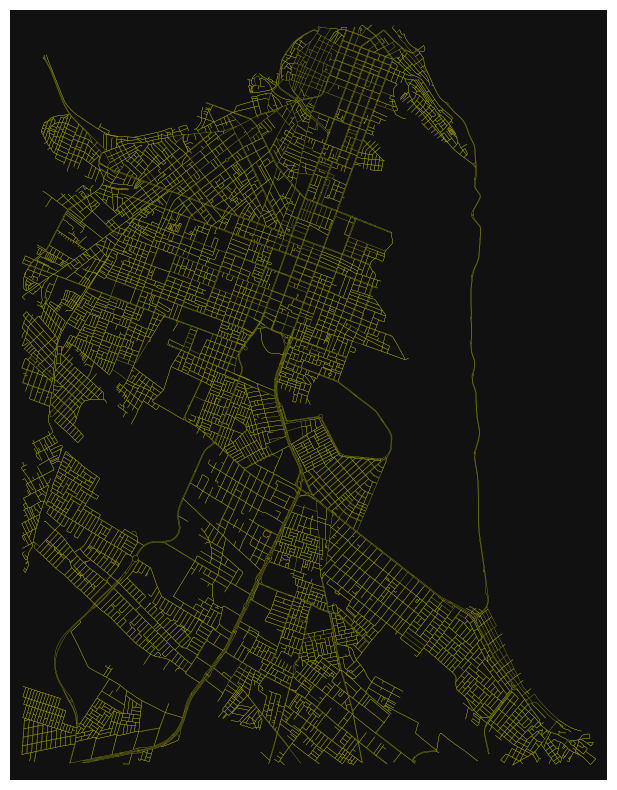

In [11]:
bbox = -5.889089,-5.779976, -35.1647309, -35.249854

# create network from point, inside bounding box of N, S, E, W each 750m from point
G = ox.graph_from_bbox(bbox=bbox, network_type="drive")

fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color="y", edge_linewidth=0.2)

In [19]:
# prompt: plote o grafo g com as arestas pertencentes ao diâmetro em destaque

# Assuming G_drive_simple is already defined and loaded with your graph data

# Convert the MultiDiGraph to an undirected Graph if it's not already
# This assumes you want to analyze connectivity regardless of edge direction
G_undirected = G.to_undirected()

# Compute the diameter of the graph
#diameter = nx.diameter(G)  # Use G_undirected if diameter should be on undirected graph
#print("Diameter of G_drive:", diameter)

# Find the nodes that form the diameter
nodes_in_diameter = nx.periphery(G_undirected) # Use G_undirected here

# Find the shortest path between the nodes in the diameter
# Find the pair of nodes with the longest shortest path (diameter)
farthest_nodes = None
max_path_length = 0
for u in G_undirected.nodes():  # Use G_undirected for node iteration
    for v in G_undirected.nodes():
        try:
            path_length = nx.shortest_path_length(G_undirected, source=u, target=v)  # Use G_undirected
            if path_length > max_path_length:
                max_path_length = path_length
                farthest_nodes = (u, v)
        except nx.NetworkXNoPath:
            pass
if farthest_nodes:
    diameter_path = nx.shortest_path(G_undirected, source=farthest_nodes[0], target=farthest_nodes[1])  # Use G_undirected

    # Create a list of edges that form the diameter path
    diameter_edges = [(diameter_path[i], diameter_path[i + 1]) for i in range(len(diameter_path) - 1)]

    # Plot the graph with the diameter path highlighted in green
    # Note: If you want to plot the original directed graph 'G',
    # you should use G.edges() instead of G_undirected.edges() here.
    edge_colors = ['green' if edge in diameter_edges else 'gray' for edge in G_undirected.edges()]
    fig, ax = ox.plot_graph(G,  # Or G_undirected, depending on what you want to visualize
                            figsize=(10, 10),
                            node_size=0,
                            edge_color=edge_colors,
                            edge_linewidth=0.5,
                            bgcolor='white')
else:
    print("Could not find a diameter path.")

KeyboardInterrupt: 

## Shortest Path Lenght

In [ ]:
# prompt: calcule shortest_path_lenght(G_drive_simple), not avarage

try:
  shortest_path_length = nx.shortest_path_length(G_drive_simple, source=list(G_drive_simple.nodes())[0], target=list(G_drive_simple.nodes())[1])
  print("Shortest Path Length:", shortest_path_length)
except nx.NetworkXNoPath:
  print("No path found between the specified nodes.")
